In [1]:
from dense_subgraph import sdp, qp
import utils
import classification
from pipeline import Pipeline
from de_transformer import DiscriminativeEdgesTransformer
from cs_transformer import ContrastSubgraphTransformer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [2]:
DATASET_NAME = "male"
DATA_DESCRIPTOR = "Lanciano-Processed"

In [3]:
A_GRAPH_DIR = f"./datasets/{DATASET_NAME}/asd/"
B_GRAPH_DIR = f"./datasets/{DATASET_NAME}/td/"
a_label="ASD"
b_label="TD"

In [4]:
# Read brain graph files into numpy arrays
graphs_A = utils.get_graphs_from_files(A_GRAPH_DIR)
graphs_B = utils.get_graphs_from_files(B_GRAPH_DIR)

graphs, labels = utils.label_and_concatenate_graphs(graphs_A=graphs_A, graphs_B=graphs_B, a_label=a_label, b_label=b_label)

## Discriminative Edges

In [8]:
# Set up possible values of parameters to optimize over
p_grid = {"SVC": {"C": [0.1, 1, 100, 500], "gamma": [0.0001, 0.001, 0.01, 0.1, 1]},
          "DiscriminativeEdgesTransformer": {
            "a_label": [a_label],
            "b_label": [b_label],
            "num_edges": [2, 3, 4, 5, 6],
            }
          }

pipe = [DiscriminativeEdgesTransformer, StandardScaler, SVC]


inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results, summary = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_param_grids=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, random_state=42, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-DE-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write("summary:\n" + str(summary) + "\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("parameter grid:\n" + str(p_grid) + "\n")
    fp.write("\n============================================================\n")

grid_search_cv will take aproximately 0:00:59.040000


KeyboardInterrupt: 

# Contrast Subgraph Methods

In [10]:
# Set up possible values of parameters to optimize over
p_grid = {"SVC": {"C": [0.1, 1, 100], "gamma": [0.0001, 0.001, 0.1, 1]},
          "ContrastSubgraphTransformer": {
            "a_label": ["ASD"],
            "b_label": ["TD"],
            "alpha": [None],
            "alpha2": [None],
            }
          }

pipe = [ContrastSubgraphTransformer, StandardScaler, SVC]


inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## CSP1 QP N3

In [6]:
p_grid["ContrastSubgraphTransformer"]["problem"] = [1]
p_grid["ContrastSubgraphTransformer"]["solver"] = [qp]
p_grid["ContrastSubgraphTransformer"]["num_cs"] = [3]
# ASD - TD
p_grid["ContrastSubgraphTransformer"]["percentile"] = [65, 70, 75, 80, 85]
# TD - ASD
p_grid["ContrastSubgraphTransformer"]["percentile2"] = [65, 70, 75, 85, 95]

results, summary = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_param_grids=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-CSP1-QP-N3-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write("summary:\n" + str(summary) + "\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("parameter grid:\n" + str(p_grid) + "\n")
    fp.write("\n============================================================\n")

grid_search_cv will take aproximately 2:27:36.225000


KeyboardInterrupt: 

## CSP2 QP N3

grid_search_cv will take aproximately 0:04:24.359340
grid_search_cv will take aproximately 0:05:01.633080
grid_search_cv will take aproximately 0:04:27.723120
grid_search_cv will take aproximately 0:04:23.703720
grid_search_cv will take aproximately 0:04:38.061000


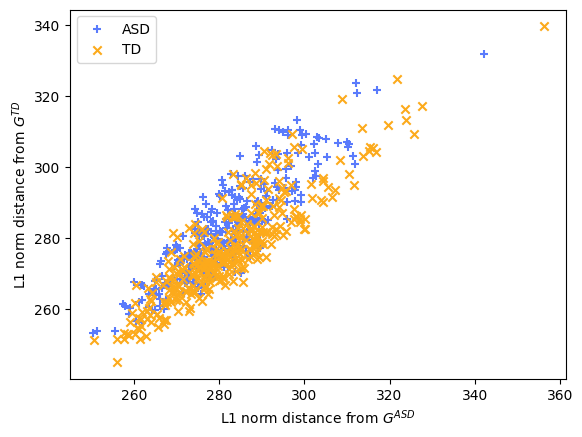

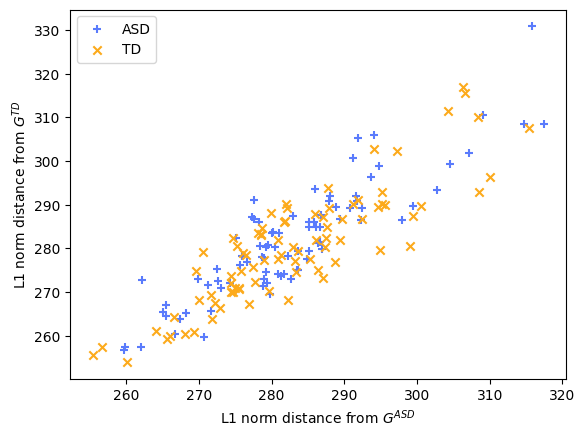

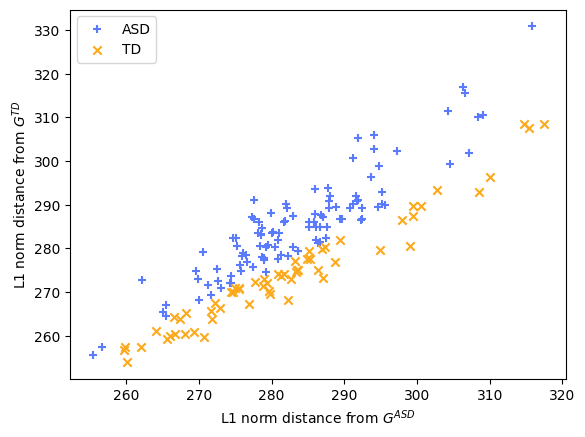

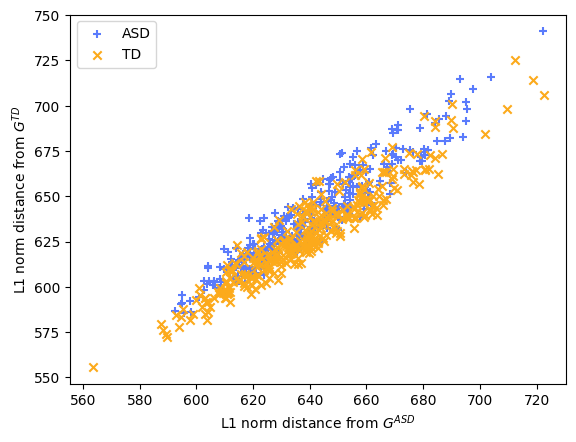

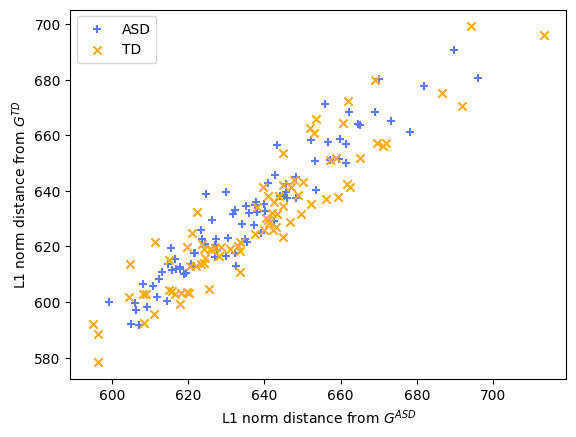

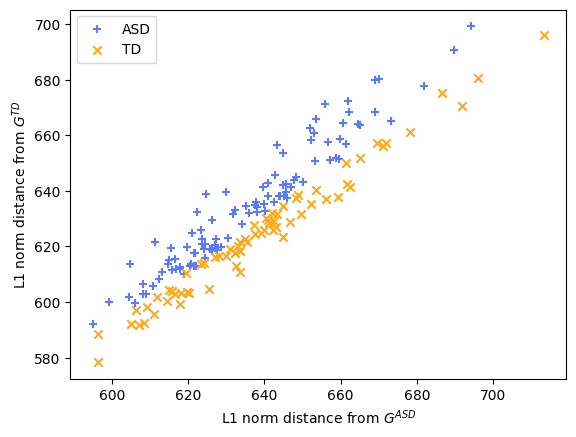

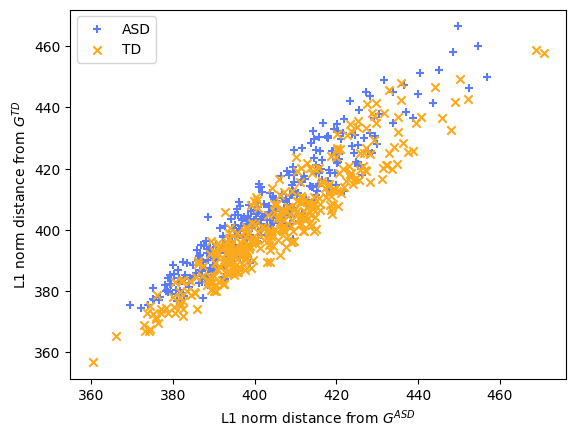

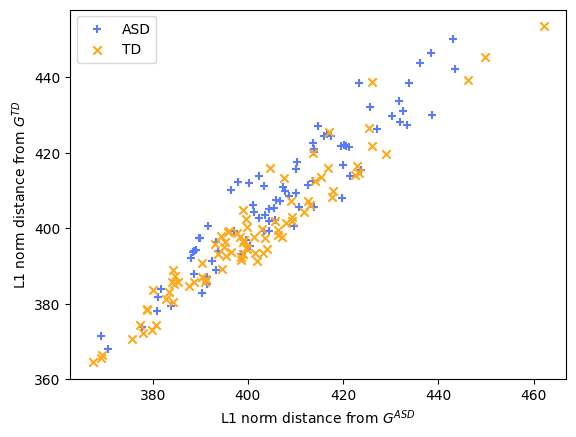

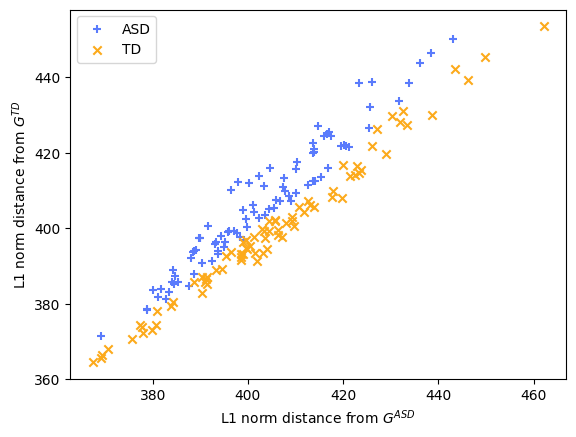

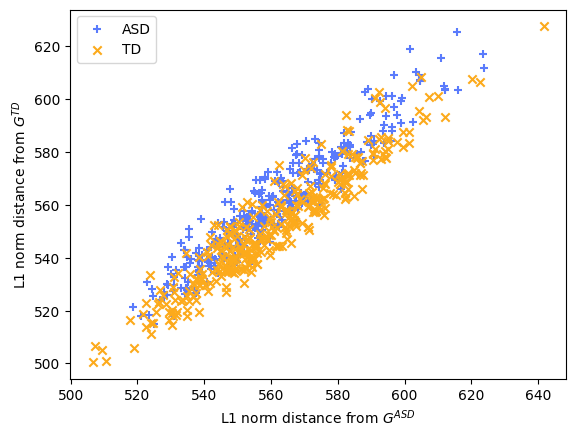

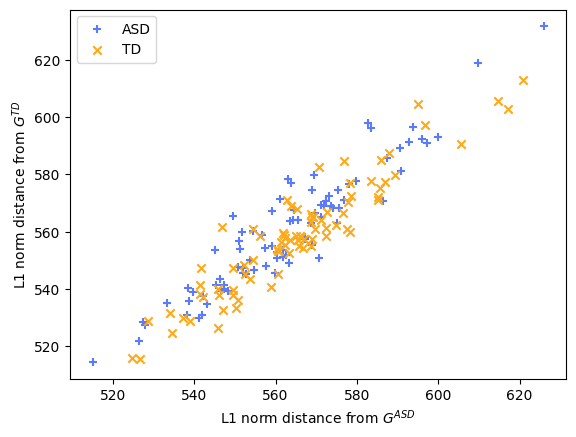

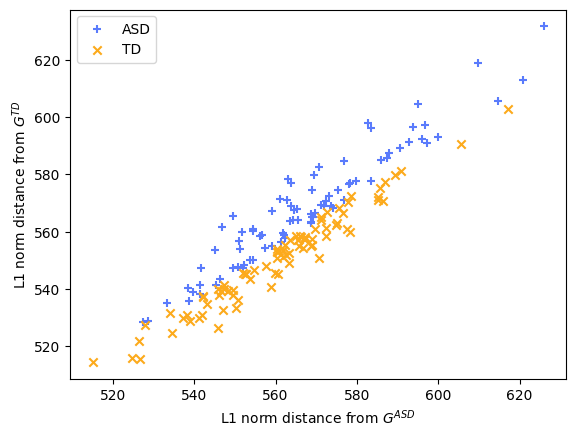

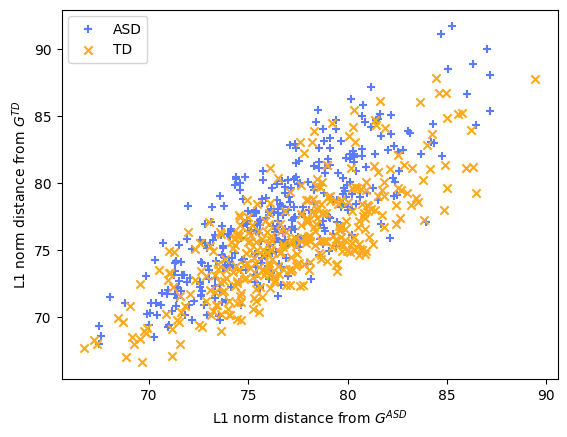

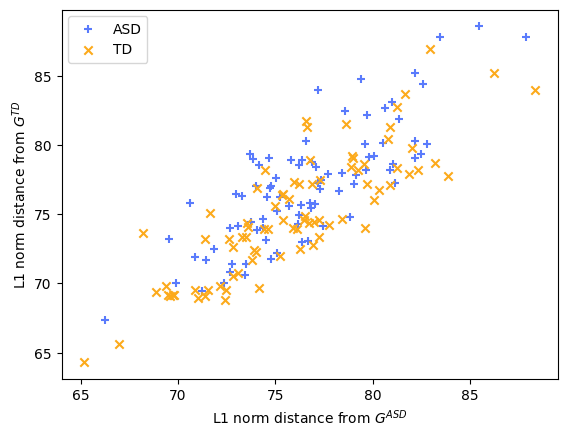

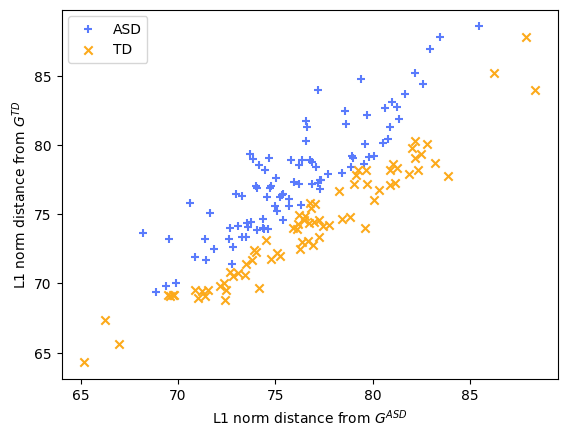

In [11]:
p_grid["ContrastSubgraphTransformer"]["problem"] = [2]
p_grid["ContrastSubgraphTransformer"]["solver"] = [qp]
p_grid["ContrastSubgraphTransformer"]["num_cs"] = [3]
# ASD - TD
p_grid["ContrastSubgraphTransformer"]["percentile"] = [65, 70, 75, 80, 85, 90, 95]
# TD - ASD
p_grid["ContrastSubgraphTransformer"]["percentile2"] = [None]

results, summary = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_param_grids=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-CSP2-QP-N3-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write("summary:\n" + str(summary) + "\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("parameter grid:\n" + str(p_grid) + "\n")
    fp.write("\n============================================================\n")

## CSP1 SDP N1

In [12]:
p_grid["ContrastSubgraphTransformer"]["problem"] = [1]
p_grid["ContrastSubgraphTransformer"]["solver"] = [sdp]
p_grid["ContrastSubgraphTransformer"]["num_cs"] = [1]
# ASD - TD
p_grid["ContrastSubgraphTransformer"]["percentile"] = [65, 70, 75, 80, 85]
# TD - ASD
p_grid["ContrastSubgraphTransformer"]["percentile2"] = [65, 70, 75, 85, 95]

results, summary = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_param_grids=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-CSP1-SDP-N1-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write("summary:\n" + str(summary) + "\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("parameter grid:\n" + str(p_grid) + "\n")
    fp.write("\n============================================================\n")

grid_search_cv will take aproximately 2:37:15.901500


KeyboardInterrupt: 

## CSP2 SDP N1

In [13]:
p_grid["ContrastSubgraphTransformer"]["problem"] = [2]
p_grid["ContrastSubgraphTransformer"]["solver"] = [sdp]
p_grid["ContrastSubgraphTransformer"]["num_cs"] = [1]
# ASD - TD
p_grid["ContrastSubgraphTransformer"]["percentile"] = [65, 70, 75, 80, 85, 90, 95]
# TD - ASD
p_grid["ContrastSubgraphTransformer"]["percentile2"] = [None]

results, summary = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_param_grids=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-CSP2-SDP-N1-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write("summary:\n" + str(summary) + "\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("parameter grid:\n" + str(p_grid) + "\n")
    fp.write("\n============================================================\n")

grid_search_cv will take aproximately 0:14:11.786040


KeyboardInterrupt: 